## Scikit-Learn Example

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from __future__ import division
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
import theano
import cv2
from sklearn import preprocessing
%pylab inline

Using Theano backend.
WARNING (theano.configdefaults): Only clang++ is supported. With g++, we end up with strange g++/OSX bugs.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


Populating the interactive namespace from numpy and matplotlib


### Make some sample data
- Make synthetic 2D data with 4 'real' clusters

In [39]:
from sklearn.datasets import make_blobs

df = pd.read_csv('2016-17_advanced.csv')
df = df.groupby('Player').min()
df.reset_index(inplace=True)
df = df[df['MP'] >= 500]
df = df[df['Yr'] >= 2011]
df = df[df['Age'] <= 23]
df.reset_index(inplace=True, drop=True)
df2 = pd.read_csv('2016-17_advanced.csv')
grab1 = np.array(df['Player_ID'].values)
grab2 = np.array(df['Yr'].values)

cats = []

for i in range(len(grab1)):
    df_cat = df2[df2['Player_ID'] == grab1[i]]
    cats.extend(df_cat[df_cat['Yr'] == grab2[i] + 1].index.values)

df2 = df2.iloc[cats]
df2.reset_index(inplace=True, drop=True)
df = df[df['Player_ID'].isin(df2['Player_ID'].values)]
df.reset_index(inplace=True, drop=True)
df['Player_ID'] = df['Player_ID'].astype(int)

# df3 = pd.read_csv('2016-17_advanced.csv')
# df3 = df3[df3['MP'] >= 500]
# df3 = df3[df3['Yr'] >= 2016]
# df3 = df3[df3['Age'] <= 23]
# df3 = df3[~df3['Player_ID'].isin(df['Player_ID'])].groupby('Player').min()
# df3.reset_index(inplace=True)

# df = df.append(df3, ignore_index=True)
y = np.array(df2['OBPM'].values) 
pid = np.array(df['Player_ID'].values)
yr = np.array(df['Yr'].values)
images = []
for i in range(len(pid)):
    images.append(cv2.imread('thumbnails/thumbnail_{0}_{1}-{2}.png'.format(str(pid[i]), str(yr[i]-1), str(yr[i])[-2:]), 0))
X = np.array(images)
flat_exes = []
for i in range(len(X)):
    flat_exes.append(X[i].flatten())
X = np.array(flat_exes)
print(len(X))

239


#### Scatterplot of sample data

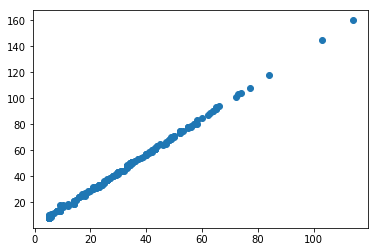

In [40]:
plt.scatter(X[:,0], X[:,1])

### Use 'Elbow' method to find optimal value of K

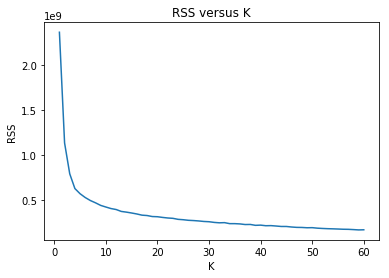

In [41]:
from sklearn.cluster import KMeans
ncluster_list = range(1,61)

def kmean_score(nclust):
    km = KMeans(nclust)
    km.fit(X)
    rss = -km.score(X)
    return rss
scores = [kmean_score(i) for i in range(1,61)]
plt.plot(range(1,61), scores)
plt.xlabel('K')
plt.ylabel('RSS')
plt.title('RSS versus K')


### Use Silhouette scores to find optimal value of K

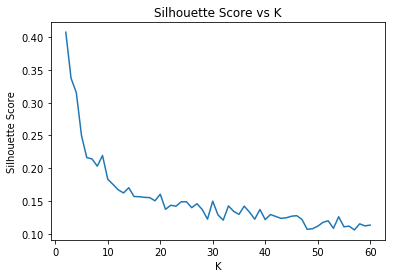

In [42]:
from sklearn.metrics import silhouette_score
def get_silhouette_score(nclust):
    km = KMeans(nclust)
    km.fit(X)
    sil_avg = silhouette_score(X, km.labels_)
    return sil_avg
sil_scores = [get_silhouette_score(i) for i in range(2,61)]
plt.plot(range(2,61), sil_scores)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')


The maximum silhouette score is at 2 and there is a local maximum at 4

### Silhouette Plots provide even more detail about each clustering

In [45]:
# from helper import cluster_and_plot
# for i in range(8,15):
#     cluster_and_plot(X, i)

In [43]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

n_clusters = 30

clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 30 The average silhouette_score is : 0.135454704287


In [45]:
df['cluster'] = cluster_labels

In [46]:
df[df['cluster'] == 0]

,Player,Player_ID,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Yr,cluster
40,Damian Lillard,203081,PG,22,POR,73,2670,16.4,0.546,0.388,...,5.1,0.7,5.8,0.088,2.7,-2.4,0.3,1.9,2013,0
41,Dario Saric,203967,PF,22,PHI,78,2023,12.8,0.508,0.368,...,-1.2,1.2,1.0,0.023,-2.0,-1.4,-2.2,-0.1,2017,0
52,Domantas Sabonis,1627734,C,20,IND,74,1632,6.9,0.469,0.024,...,-1.0,1.8,0.7,0.022,-4.7,-0.1,-4.9,-1.2,2017,0
54,Donovan Mitchell,1628378,SG,21,UTA,77,2598,16.7,0.537,0.339,...,1.3,3.7,5.0,0.092,0.8,-0.2,0.6,1.7,2018,0
67,Frank Kaminsky,1626163,C,22,CHO,47,755,12.5,0.502,0.383,...,0.4,0.5,1.8,0.056,-1.6,-1.9,-1.5,0.2,2016,0
69,Fred VanVleet,1627832,PG,23,TOR,64,1520,13.7,0.539,0.479,...,2.4,1.9,4.3,0.117,0.7,-0.7,0.0,0.9,2018,0
96,Jerami Grant,203924,PF,20,OKC,65,1377,8.7,0.470,0.241,...,-0.9,1.4,0.5,0.019,-4.3,0.2,-3.3,-0.5,2015,0
134,Kyle Kuzma,1628398,PF,22,LAL,70,2314,14.0,0.546,0.388,...,1.2,1.9,3.1,0.065,-0.3,-1.3,-1.7,0.2,2018,0
143,Lauri Markkanen,1628374,PF,20,CHI,52,1682,15.6,0.552,0.418,...,1.3,1.5,2.7,0.078,-0.6,-1.6,-1.9,0.0,2018,0
145,Lonzo Ball,1628366,PG,20,LAL,47,1423,11.7,0.444,0.500,...,-0.5,1.7,1.6,0.052,-0.9,1.5,0.5,0.9,2018,0


In [232]:
from __future__ import division
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
import theano
import cv2
from sklearn import preprocessing

def load_and_condition_data():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
    X_train.resize(y_train.shape[0], (X_train.size//y_train.shape[0])) # 28 pix x 28 pix = 784 pixels
    X_test.resize(y_test.shape[0], (X_test.size//y_test.shape[0]))
    theano.config.floatX = 'float32'
    X_train = X_train.astype(theano.config.floatX) #before conversion were uint8
    X_test = X_test.astype(theano.config.floatX)
    print('\nFirst 5 labels of y_train: ', y_train[:5])
    return X_train, y_train, X_test, y_test

def define_nn_mlp_model(X_train, y_train):#_ohe):
    ''' defines multi-layer-perceptron neural network '''
    # available activation functions at:
    # https://keras.io/activations/
    # https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'
    # there are other ways to initialize the weights besides 'uniform', too

    model = Sequential() # sequence of layers
    num_neurons_in_layer = 500 # number of neurons in a layer
    num_inputs = X_train.shape[1] # number of features (684288)
    model.add(Dense(input_dim=num_inputs,
                     units=num_neurons_in_layer,
                     activation='tanh')) # only 12 neurons in this layer!
    model.add(Dense(input_dim=num_neurons_in_layer,
                     units=1,
                     activation='linear')) # only 12 neurons - keep softmax at last layer
    sgd = SGD(lr=0.3, decay=1e-7, momentum=0.35) # using stochastic gradient descent (keep)
    model.compile(loss='mae', optimizer='adam', metrics=['mse'] ) # (keep)
    return model


rng_seed = 21 # set random number generator seed
X = np.array(df[['OBPM', 'AST%', 'TS%', 'cluster', 'Age']].values)
X_train, y_train, X_test, y_test = load_and_condition_data() #, y_train_ohe = load_and_condition_data()
np.random.seed(rng_seed)
model = define_nn_mlp_model(X_train, y_train) #ohe
model.fit(X_train, y_train, epochs=100, batch_size=4, verbose=1,
          validation_split=0.2) # cross val to estimate test error #ohe


First 5 labels of y_train:  [-0.5  1.1  0.5  1.4 -0.9]
Train on 68 samples, validate on 18 samples
Epoch 1/100
44/68 [==================>...........] - ETA: 1s - loss: 1.8053 - mean_squared_error: 5.3344

KeyboardInterrupt: 

In [226]:
yo = model.predict(X_test)

In [227]:
for i in range(len(yo)):
    print(yo[i], y_test[i])

[-0.36256069] -1.2
[-0.27216238] -0.7
[-0.68113655] -1.6
[ 1.22652316] -1.7
[-0.70342255] 2.5
[ 1.74581242] 1.5
[ 1.57166469] -0.2
[-0.82104659] -1.2
[-1.31312871] -3.7
[ 0.88907123] 3.9
[-0.71820408] 2.4
[ 1.09497011] -1.3
[ 0.7977069] -2.1
[ 1.01153398] -2.6
[-0.24657784] -2.6
[-0.59601003] 0.7
[ 1.19905436] 1.7
[ 2.84721041] -0.9
[ 3.86432195] 3.1
[ 1.89161599] -0.5
[-0.17280559] -2.1
[-0.72214293] 1.5
[-0.24491544] -0.1
[ 1.42207694] 4.2
[-0.53557932] -0.3
[ 0.74970776] 0.0
[ 1.35351431] 3.3
[-0.89954764] -0.1
[-1.17149019] 1.6


In [267]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

X = np.array(df[['OBPM', 'cluster', 'Age']].values)
y = np.array(df2['Survive'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)
clf = RandomForestClassifier(random_state=0, n_estimators=1000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_score = lg.score(X_test, y_test)
lg.predict(X_test)
print(lg_score)


             precision    recall  f1-score   support

          0       0.93      1.00      0.96        25
          1       1.00      0.50      0.67         4

avg / total       0.94      0.93      0.92        29

0.931034482759


In [256]:
survive = []

for i in range(len(df2)):
    if [df2['OBPM'] >= 2][0][i] == True:
        survive.append(1)
    if [df2['OBPM'] >= 2][0][i] == False:
        survive.append(0)
        
df2['Survive'] = survive

In [272]:
lg.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [271]:
y_test

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [23]:
df

,Player,Player_ID,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Yr
0,Aaron Gordon,203932,PF,19,ORL,47,797,11.4,0.517,0.231,...,15.5,0.3,0.7,1.0,0.060,-2.8,-0.4,-2.8,-0.2,2015
1,Adreian Payne,203940,PF,23,TOT,32,739,7.7,0.443,0.041,...,17.0,-0.7,0.2,-0.5,-0.033,-4.6,-1.3,-5.9,-0.7,2015
2,Al-Farouq Aminu,202329,PF,20,DAL,61,1366,9.6,0.481,0.040,...,13.7,-0.8,1.4,0.7,0.022,-3.1,0.1,-3.0,-0.4,2011
3,Alec Burks,202692,SG,20,TOT,27,653,11.5,0.501,0.126,...,19.0,-0.1,0.4,0.8,0.044,-3.3,-2.2,-4.2,-0.4,2012
4,Alex Len,203458,C,21,ATL,69,1395,12.4,0.482,0.008,...,13.7,-0.5,1.0,1.3,0.035,-4.4,-0.8,-3.6,-0.7,2015
5,Allen Crabbe,203459,SG,22,BRK,43,683,7.7,0.519,0.420,...,11.5,-0.2,0.8,0.8,0.035,-1.9,-1.4,-2.5,-0.1,2015
6,Alonzo Gee,202087,SF,23,CLE,54,662,8.4,0.491,0.188,...,9.2,-0.1,0.6,0.9,0.036,-3.3,-0.1,-2.6,-0.2,2011
7,Andre Drummond,203083,C,19,DET,60,1243,20.9,0.499,0.002,...,16.7,1.4,2.3,4.5,0.133,-2.1,0.5,-0.5,1.0,2013
8,Andre Roberson,203460,SF,23,OKC,39,1037,9.1,0.510,0.222,...,8.6,0.5,1.3,2.1,0.079,-2.1,1.3,0.0,0.7,2015
9,Andrew Nicholson,203094,PF,23,ORL,56,823,9.9,0.489,0.000,...,19.3,-0.4,0.8,0.6,0.025,-4.7,-2.0,-6.7,-1.4,2013


In [27]:
df2 = pd.read_csv('2016-17_advanced.csv')
df2 = df2[df2['Player_ID'].isin(df['Player_ID'])]
df2.sort_values('Player')

,Player,Player_ID,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Yr
5841,Blake Griffin,201933,PF,29,DET,75,2622,21.0,0.581,0.389,...,30.2,5.1,2.9,8.0,0.147,4.2,0.4,4.6,4.4,2019
5842,Blake Griffin,201933,PF,28,TOT,58,1970,19.6,0.544,0.323,...,28.9,3.2,1.8,4.9,0.120,2.9,-0.1,2.8,2.4,2018
5843,Blake Griffin,201933,PF,27,LAC,61,2076,22.7,0.569,0.116,...,28.0,5.4,2.4,7.7,0.179,3.2,1.3,4.4,3.4,2017
5844,Blake Griffin,201933,PF,26,LAC,35,1170,22.1,0.544,0.030,...,29.8,2.2,1.6,3.8,0.156,1.7,1.6,3.3,1.6,2016
5845,Blake Griffin,201933,PF,25,LAC,67,2356,22.8,0.551,0.022,...,28.4,6.6,2.4,9.0,0.183,3.1,1.0,4.1,3.6,2015
5846,Blake Griffin,201933,PF,24,LAC,80,2863,23.9,0.583,0.032,...,29.0,8.1,4.1,12.2,0.205,3.0,1.6,4.6,4.8,2014
5847,Blake Griffin,201933,PF,23,LAC,80,2598,22.4,0.572,0.026,...,25.4,6.8,3.9,10.6,0.196,2.9,1.9,4.8,4.5,2013
5848,Blake Griffin,201933,PF,22,LAC,66,2392,23.4,0.557,0.016,...,26.6,6.6,2.6,9.2,0.185,3.1,1.1,4.1,3.7,2012
5849,Blake Griffin,201933,PF,21,LAC,82,3112,21.9,0.549,0.017,...,27.3,6.5,3.4,9.8,0.152,2.2,0.9,3.2,4.0,2011
5872,Ricky Rubio,201937,PG,28,UTA,68,1899,14.0,0.520,0.348,...,22.7,0.9,2.8,3.7,0.095,-0.6,0.6,0.0,0.9,2019


In [31]:
len(pid)

284